In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler
# datasets path
dataset_url = 'Datasets for Assignment 2'


In [3]:
#Task 1

#Imports data
insurance = pd.read_csv(f'{dataset_url}/insurance.csv')
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# region of hight total charge 
insurance[insurance.charges == insurance.charges.max()].region

543    southeast
Name: region, dtype: object

In [5]:
# pivot tabel of highest average charge value
insurance.pivot_table(index = ['gender', 'children'],
    values = 'charges', aggfunc = 'mean',).sort_values(by='charges', ascending=False).head(1)

,,charges
gender,children,
male,3,16789.167419


In [6]:
# check ttest of 
smokers_charges = insurance[insurance.smoker == 'yes'].charges
non_smokers_charges = insurance[insurance.smoker == 'no'].charges

print(f'Smokers average charges {smokers_charges.mean()}')
print(f'Non smokers average charges {non_smokers_charges.mean()}')

stats.ttest_ind(smokers_charges, non_smokers_charges, trim=.2)


Smokers average charges 32050.23183153284
Non smokers average charges 8434.268297856204


Ttest_indResult(statistic=41.109124713048736, pvalue=7.884556804415567e-200)

In [60]:
insurance.groupby(['region'])[['age', 'charges']].corr()


In [8]:
# check health status

insurance['healthy'] = np.where( ( (insurance.bmi >= 18.5) & (insurance.bmi <= 24.9)), True, False )
insurance['healthy'].value_counts()


False    1116
True      222
Name: healthy, dtype: int64

In [9]:
# calculate average charges and perform ttest

healthy = insurance[insurance.healthy == True].charges
unhealthy = insurance[insurance.healthy == False].charges

print(f'the average value of charges for healty people is {healthy.mean()}')
print(f'the average value of charges for unhealty people is {unhealthy.mean()}')

# print the ttest result
print(stats.ttest_ind(healthy, unhealthy))

the average value of charges for healty people is 10379.499732162161
the average value of charges for unhealty people is 13845.498252884408
Ttest_indResult(statistic=-3.915429921070768, pvalue=9.479705268350188e-05)


In [10]:
# Test 2

# load datasets

marketing_business = pd.read_csv(f'{dataset_url}/marketing_business.csv')
marketing_demographics = pd.read_csv(f'{dataset_url}/marketing_demographics.csv')

# combine them together
marketing =  pd.merge(marketing_business, marketing_demographics, on="ID")
marketing.head()


,ID,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response,Education,Marital_Status,Income,Country,Age,Children
0,1826,1190,14,4,10,0,1,0,1,Graduation,Divorced,84835.0,SP,52,0
1,1,577,17,7,10,1,5,0,1,Graduation,Single,57091.0,CA,61,0
2,10476,251,10,3,7,0,2,0,0,Graduation,Married,67267.0,US,64,1
3,1386,11,3,1,2,0,7,0,0,Graduation,Together,32474.0,AUS,55,2
4,5371,91,6,3,3,1,7,0,1,Graduation,Single,21474.0,SP,33,1


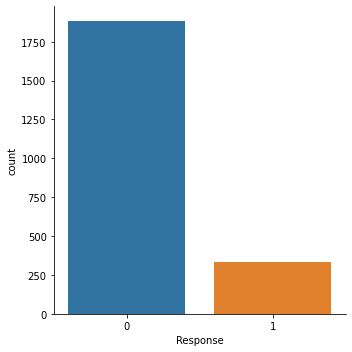

In [11]:
# Barplot of Response

sns.catplot(x = 'Response', data=marketing, kind='count')
plt.show()

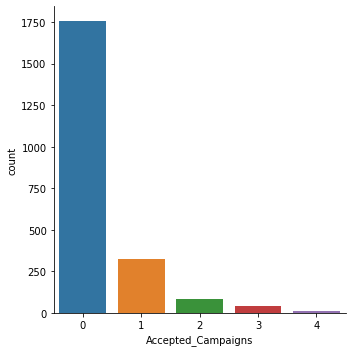

In [12]:
# barplot of Accept Campaigns
sns.catplot(x='Accepted_Campaigns', data=marketing, kind='count')

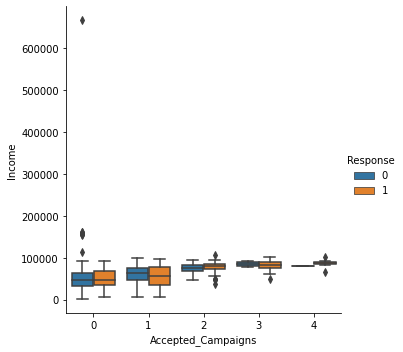

In [13]:
# relationship between income of the customer and response to campaigns

sns.catplot(x='Accepted_Campaigns', y='Income', data=marketing, kind='box', hue='Response')
plt.show()

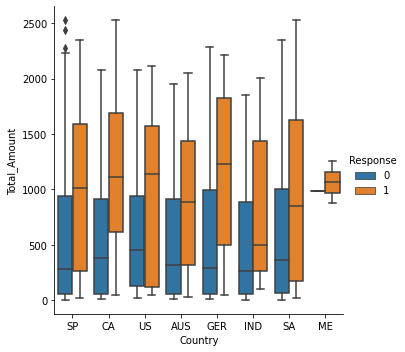

In [14]:
# spending (amount and purchase) across countries;

sns.catplot(x="Country", y="Total_Amount", data=marketing, kind='box', hue='Response')
plt.show()

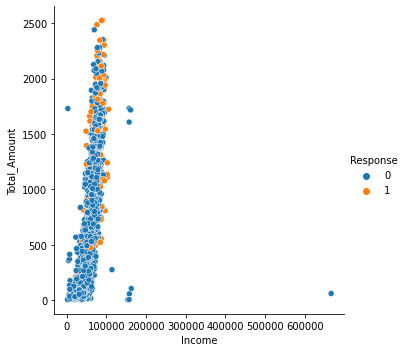

In [15]:
# relationship between income and total amount

sns.relplot(x='Income', y='Total_Amount', data=marketing, kind='scatter', hue='Response')
plt.show()

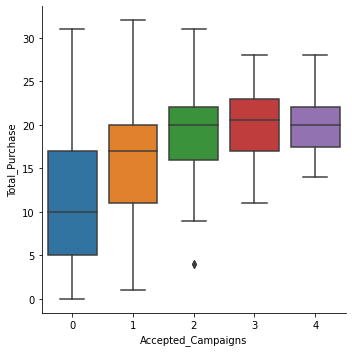

In [16]:
# relationship between total amount/purchase and response to current
# and past campaigns.

sns.catplot(x='Accepted_Campaigns', y='Total_Purchase', data=marketing, kind='box')
plt.show()

                      ID  Total_Amount  Total_Purchase  Web_Purchase  \
ID              1.000000     -0.017052       -0.013850     -0.018476   
Total_Amount   -0.017052      1.000000        0.822948      0.528973   
Total_Purchase -0.013850      0.822948        1.000000      0.770534   
Web_Purchase   -0.018476      0.528973        0.770534      1.000000   
Store_Purchase -0.009128      0.831940        0.945887      0.522003   

                Store_Purchase  Accepted_Campaigns  Website_Visit  Complaint  \
ID                   -0.009128           -0.034853      -0.007794   0.034154   
Total_Amount          0.831940            0.457095      -0.499082  -0.037428   
Total_Purchase        0.945887            0.307005      -0.426645  -0.022441   
Web_Purchase          0.522003            0.196823      -0.051226  -0.016642   
Store_Purchase        1.000000            0.310621      -0.544841  -0.021557   

                Response    Income       Age  Children  
ID             -0.021491  0.0

<AxesSubplot:>

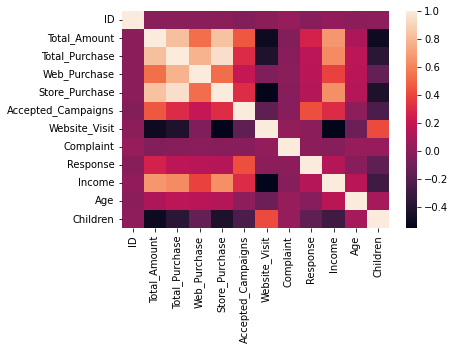

In [17]:
#   Descriptive statistics:
# correlation of dataset

corr_market = marketing.corr()
print(corr_market.head())
sns.heatmap(corr_market)

In [18]:
# compare average of total amount based on response

marketing.groupby('Response').Total_Amount.mean()

Response
0    540.124270
1    985.660661
Name: Total_Amount, dtype: float64

In [19]:
# compare average of total purchase based on response

marketing.groupby('Response').Total_Purchase.mean()

Response
0    12.062666
1    15.354354
Name: Total_Purchase, dtype: float64

In [20]:
# compare total of accepted campaigns based on response

marketing.groupby('Response').Accepted_Campaigns.count()

Response
0    1883
1     333
Name: Accepted_Campaigns, dtype: int64

In [21]:
# compare average of accepted campaigns based on response

marketing.groupby('Response').Website_Visit.mean()

Response
0    5.321296
1    5.306306
Name: Website_Visit, dtype: float64

In [22]:

# compare average of complaint based on response

marketing.groupby('Response').Complaint.mean()

Response
0    0.009559
1    0.009009
Name: Complaint, dtype: float64

In [23]:
# compare average of income based on response

marketing.groupby('Response').Income.mean()

Response
0    50839.132767
1    60209.675676
Name: Income, dtype: float64

In [24]:
# compare average of age based on response

marketing.groupby('Response').Age.mean()

Response
0    53.298991
1    52.504505
Name: Age, dtype: float64

In [25]:
# compare total of children based on response

marketing.groupby('Response').Children.count()

Response
0    1883
1     333
Name: Children, dtype: int64

In [26]:
# test 3
# removing outliers from datasets

outliers_charges = insurance.charges.quantile(0.95)

bottom_outliers_bmi = insurance.bmi.quantile(0.02) 
top_outliers_bmi = insurance.bmi.quantile(0.98) 


insurance = insurance[(insurance['charges'] < outliers_charges)& 
                        (insurance['bmi'] < top_outliers_bmi) & 
                        ( insurance['bmi'] > bottom_outliers_bmi )]
insurance.head()

,age,gender,bmi,children,smoker,region,charges,healthy
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,False


In [27]:
# dummy variables
dummy_region = pd.get_dummies(insurance.region, prefix='region')
dummy_region.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [28]:
# creating catagorical column

bmi_bins = [0, 18.5, 24.9, 30, 100]
bmi_names = ['Underweight', 'Healthy', 'Overweight', 'Obese']

insurance['bmi_cat'] = pd.cut(insurance.bmi, bmi_bins, labels = bmi_names)
insurance.head(10)


,age,gender,bmi,children,smoker,region,charges,healthy,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,False,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,False,Obese
2,28,male,33.000,3,no,southeast,4449.46200,False,Obese
3,33,male,22.705,0,no,northwest,21984.47061,True,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,False,Overweight
5,31,female,25.740,0,no,southeast,3756.62160,False,Overweight
6,46,female,33.440,1,no,southeast,8240.58960,False,Obese
7,37,female,27.740,3,no,northwest,7281.50560,False,Overweight
8,37,male,29.830,2,no,northeast,6406.41070,False,Overweight
9,60,female,25.840,0,no,northwest,28923.13692,False,Overweight


In [29]:
# create new column of has children

insurance['children_simp'] = np.where( insurance.children > 0, 1, 0 )
insurance.head(10)

,age,gender,bmi,children,smoker,region,charges,healthy,bmi_cat,children_simp
0,19,female,27.900,0,yes,southwest,16884.92400,False,Overweight,0
1,18,male,33.770,1,no,southeast,1725.55230,False,Obese,1
2,28,male,33.000,3,no,southeast,4449.46200,False,Obese,1
3,33,male,22.705,0,no,northwest,21984.47061,True,Healthy,0
4,32,male,28.880,0,no,northwest,3866.85520,False,Overweight,0
5,31,female,25.740,0,no,southeast,3756.62160,False,Overweight,0
6,46,female,33.440,1,no,southeast,8240.58960,False,Obese,1
7,37,female,27.740,3,no,northwest,7281.50560,False,Overweight,1
8,37,male,29.830,2,no,northeast,6406.41070,False,Overweight,1
9,60,female,25.840,0,no,northwest,28923.13692,False,Overweight,0


In [30]:
# scale the columns 

sc = StandardScaler()
sc.fit_transform(insurance[['charges', 'age']])

array([[ 0.54724235, -1.4101502 ],
       [-1.02677555, -1.48164649],
       [-0.74394835, -0.76668361],
       ...,
       [-1.03671416, -1.48164649],
       [-0.99745434, -1.26715763],
       [ 1.81984457,  1.59269392]])